# Group Member Detail and Individual Contribution


Student Name  | Student ID | Email
---|----|---|
Adrian Yi Kiat Teo | 110289417 | teoay004@mymail.unisa.edu.au 
Gitae Bae | 110310861 |baegy002@mymail.unisa.edu.au
Jaehong LEE | 110334854 | leejy144@mymail.unisa.edu.au
Sanghun Park |110285975 | parsy094@mymail.unisa.edu.au


---
**Team Member 1 Name: Jaehong Lee**<br/>
I contributed 987 words towards this assessment. <br/>
I worked on the following sections/questions (select whichever is appropriate)

*   Understanding the data
*   Data for Decision Tree
*   Train Decision Tree
*   Document formatting
---
**Team Member 2 Name: Gitae Bae**<br/>
I contributed 838 words towards this assessment. <br/>
I worked on the following sections/questions (select whichever is appropriate)

*   Understanding the data
*   Prepare data
*   Document formatting
---

**Team Member 3 Name: Sanghun Park**<br/>
I contributed 1136 words towards this assessment. <br/>
I worked on the following sections/questions (select whichever is appropriate)

*   Understanding the data
*   Select a Metric
*   Data for Logistic Regression
*   Train a Logistic Regression Model
*   Recommendation

---
**Team Member 4 Name: Adrian Yi Kiat Teo**<br/>
I contributed 1634 words towards this assessment. <br/>
I worked on the following sections/questions (select whichever is appropriate)

*   Understanding the data
*   Data for Neural Net
*   Train a Feed-Forward Neural Net
*   Recommendation
*   Help train for other models

---

# Data Import

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# mount Google Drive. You could also mount Google Drive using the Files tab on the left.
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass # we're not using Google Colab

Mounted at /content/drive


Load the data from the provided "train.csv" and "test.csv" files in google drive with specific path. <br/>
Remember without the data we will not be able to do the upcoming process.

In [ ]:
# Import
df_train = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/train.csv")
df_test = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/test.csv") 

#Task 1. Review and Prepare the Dataset


##Task 1a) Understanding the Data
First of all, We should survey the data to understand each attribute and distribution of attributes. We can review the data set to assess distributions of the features and the target and understand the relationships between the features and the target.

Before we train or develop the model, we need to understand the characteristics of the data. Therefore, In the Understanding data step, we will handle understand and simply analyze the data as below:
*   The data types
*   The data shape
*   The data behaviour
*   The data uniqueness
*   The data relationship

In [ ]:
df_train.shape

(103594, 26)

From the shape property, we can see that the train set had a totally of 103594 samples and 26 features.

In [ ]:
df_train.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes               int64
Order     

From the dtypes property, we can see that most of the features are integer included in the target data (satisfaction). According to the data types, we can recognise that we may need to work on binary classification model training.

In [ ]:
df_train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Order,Comfort,Service,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.507520,0.817248,39.380466,0.689857,1.028380,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,2.880961,3.312682,3.501614,0.433394
std,0.499946,0.386465,15.113125,0.462554,0.962868,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,1.063881,1.025764,0.957103,0.495546
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,0.750000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.500000,2.750000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,3.000000,3.500000,3.750000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,3.750000,4.000000,4.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,1.000000


From the described function of the train dataset, we can know that the data amount of each feature are similar which there had no missing value and each feature are balanced distributed. We also can see that there had no big difference in the mean data, most of them are positive values so we may not need to normalise the data for the decision tree and logistic model but we still need to normalise the data into 1 and 0 for the neural net model due to the activation function.

In [ ]:
df_train.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            445
Arrival Delay in Minutes              455
Order                                  20
Comfort                           

The nunique function will help us to recognise how many different values are existing in each feature. From the result, we can see that our target feature (satisfaction) is a binary flag which only contains 1 and 0.

In [ ]:
df_train.isnull()
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Order                                0
Comfort                              0
Service                              0
satisfaction             

This function shows, is there any missing value exist from each feature. And we can identify in this instance there is no missing value. Therefore, we don't need to any worry about the missing values when train and test the data.

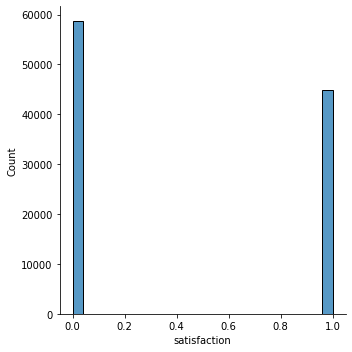

In [ ]:
sns.displot(data=df_train, x='satisfaction')

This function shows how much data exist in each value. It has data values of 'satisfaction' 0 and 1, which are target data. Of each data value, 0 has nearly 60000 data and 1 can identify that it has nearly 50000. 

With the above function, it shows satisfaction have more value at 0 than 1.

In [ ]:
df_train['satisfaction'].value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

This is satisfaction data balance. 0 is 58697, 1 is 44897. It can be seen that 0 is greater than 1 for this data balance.

In [ ]:
# Correlation with the target data
df_train.corrwith(df_train['satisfaction']).drop('satisfaction').sort_values() #use to figure out the lowest corelated

Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051718
Departure Delay in Minutes          -0.050515
Gender                              -0.012356
Gate location                        0.000449
Order                                0.126647
Age                                  0.137040
Ease of Online booking               0.171507
Customer Type                        0.187558
Food and drink                       0.209659
Checkin service                      0.235914
Inflight service                     0.244852
Baggage handling                     0.247819
Inflight wifi service                0.284163
Flight Distance                      0.298915
Cleanliness                          0.305050
Leg room service                     0.313182
On-board service                     0.322450
Seat comfort                         0.349112
Service                              0.367752
Inflight entertainment               0.398203
Type of Travel                    

Looking at the identified correlation above shows what features are related to the target feature, which is satisfaction. And it can be seen that the saturation has a higher correlation as the feature goes down. At this time, the 'Arrival Delay in Minutes' feature does not affect the target. In the case of features that have little or no effect, training data can affect accuracy and error. For example, if the target's data does not have features and correlation, that much error occurs. This means poor accuracy. When our group predicted the target using all of the above data, we got the High bias result. So that, our group had decided to exclude some of the features which have a low relation rate with satisfaction. Therefore, the features with less than 0.1 correlation will remove in the prepare data section to increase accuracy and decrease error.

* Totally five features were chosen to except during train with 'decision tree model' and 'logistic regression model'
 * Arrival Delay in Minutes
 * Departure/Arrival time convenient
 * Departure Delay in Minutes
 * Gender
 * Gate location

In order for us to find high accuracy, we need to check the correlation with the target data first. Assignment defines Satisfaction as target data for prediction. Therefore, in order to correctly predict the data of the satisfaction target, the correlation of each feature was first confirmed through a heatmap.

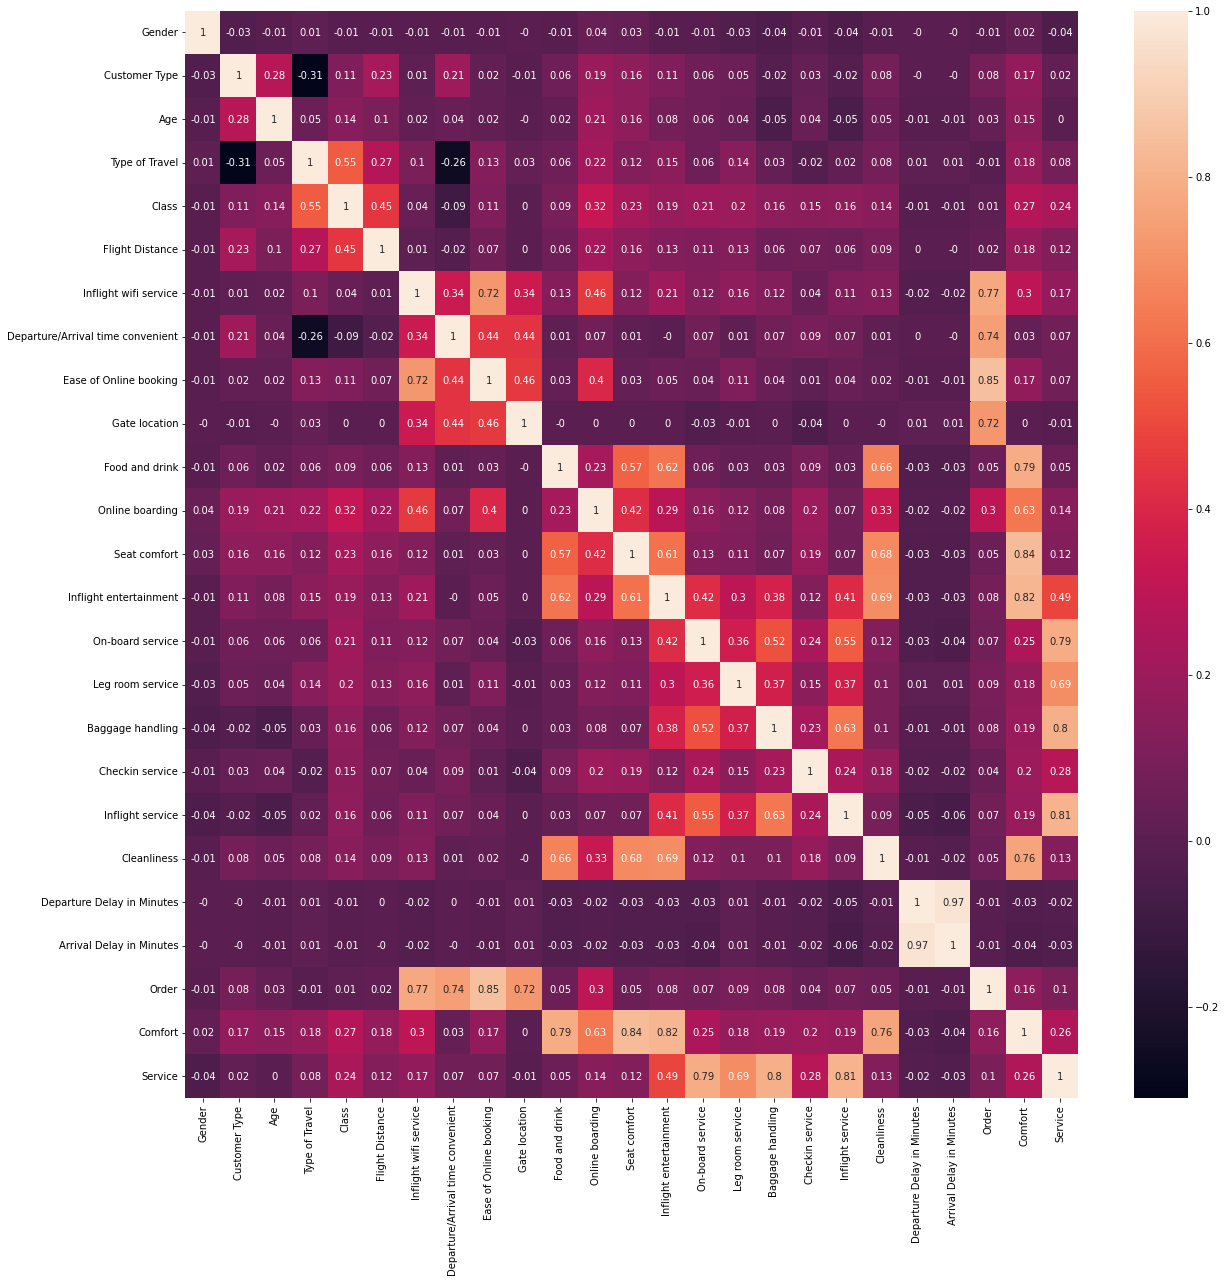

In [ ]:
_, ax = plt.subplots(figsize=(20,20))
correlation_matrix = df_train.drop(columns=['satisfaction']).corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax); 
#Use to figure out the relationship between each feature

Many features in the heatmap matrix above have correlations. But if we add too many correlation features to the model, it can be that we consider features that the model does not need. For example, in the heatmap above, 'Department Delay in Minutes' and 'Arrival Delay in Minutes' have a high correlation of 0.97. Adding these two similar features can train overlapping elements and, as a result, affect the accuracy of the target. Therefore, we dropped features such as 'Department Delay in Minutes', 'Order', 'Comfort', and 'Service' from the train model to remove duplication that has a correlation rate over 0.75.

This high correlation removal does not apply to the Decision tree, but only to the Logistic Regression model. This is because the logistic regression model easily changes the size of the correlation coefficients and is sensitive to noise even with small changes in data. And if the high correlation is not removed, the risk of overfitting increases and can have a fatal impact on the regression model. In the regression problem, we want to find out how the y variable changes when each x variable changes by one unit. In this case, the remaining variables are treated as fixed constants, but other variables in the dependent relationship cannot be fixed. As a result, the weight cannot be properly determined in the regression problem. Therefore, in the logistic regression model, high correlation needs to be removed to obtain high accuracy. However, when using the decision tree model, it has its feature selection mechanism built in. Therefore, removing a high correlation does not significantly affect the results, and the accuracy may decrease.

---
Total Description of understanding the data.
* This project has totally 103594 data set with 26 features.
* There are no missing values from all of the features.
* Target data of this project is [`satisfaction`]()
 * Satisfaction have two different value, which are 0 or 1.
 *  Satisfaction have more value of 0 than value of 1.

##Task 1b) Select a Metric

Metric evaluates the performance of the model by comparing the model's prediction with the actual results given in the test set. Therefore, in machine learning, it can identify whether the goal is achieved well through this Metric. 

In this Assignment, the evaluation Metric helps determine the performance of three models: Logistic Regression, a Decision Tree, and Feed-Forward Neural Net. And among the three models, the best model can be determined and selected according to Recall, Precision, and F-1. Each element can act differently depending on the perspective that the user considers important. Therefore, our group assumed that the importance of variables of all factors, not specific factors, should be considered.

The evaluation metric used in the Assignment data set evaluates the performance of each model through **Accuracy** and **F1-score**. Accuracy is an evaluation metric that intuitively represents model predictive performance. Therefore, we provide information so that we can determine how much the predicted data is the same as real data. However, in the case of binary classification, model performance can be distorted depending on the configuration of the data, so performance cannot be evaluated with only one accuracy value. In particular, for an unbalanced label value distribution, checking performance with accuracy is limited. To address these issues, performance can be evaluated using an F1-score. F1 score represents the harmonic mean of precision and recall, which has a compromise between each precision and recall value and is used when the data is unbalanced. We can select a model based on Precision and recall, but our group assumes that both precision and recall are important. Therefore, when selecting three models, we aim to select the most accurate model measured through F1-score and accuracy.

##Task 1c) Prepare data

 For the data partition, we decide to use cross-validation for two reasons.
1. **To prevent the model get overfitting or underfitting of the model**: It is really hard to decide the accurate percentage should we split from the training data set to get the validation data which is the dev set because the dev set had a lot of uncertainty. To select a good model for training the dev set need to be large enough to detect meaning full accuracy changes of our model, but if the dev set is too large the model will become overfitting because we may don't have enough train data to train the model and if the dev too small the model will likely become underfitting. The cross-validation can help us to decide how many dev sets do we need and prepare multiple dev set for us to train the model which can prevent the model get overfitting or underfitting because we don't do it manually.

2. **Multiple model selection**: In this assignment, we will need to train 3 models with different hyperparameters. If we do the dev data split manually we will end up only having a single dev set which is not a good approach because the different models had different complexity and hyperparameter. For example, the single dev set may fit the decision tree model, but it may become overfitting in the logistic regression model. Therefore, the best approach is to use cross-validation because it will prepare multiple dev set for us depending on the k-fold which can allow us to train multiple models with multiple dev sets and help us figure out the best model for further data prediction.


### Data For Decision Tree


From the understanding data section above we had figured out the low correlated feature to the target, so in the data preparation for the decision tree we will start by dropping those low correlated features. 

In [ ]:
low_Corelated_DT = ['Arrival Delay in Minutes', 'Departure/Arrival time convenient','Departure Delay in Minutes','Gender','Gate location']
df_train_DT = df_train.drop(low_Corelated_DT, axis=1)
df_test_DT = df_test.drop(low_Corelated_DT, axis=1)

After cleaning the train and test dataset. Now we can split the data into train and test datasets for X and Y.

In [ ]:
X_train_DT = df_train_DT.drop('satisfaction', axis=1)
Y_train_DT = df_train_DT['satisfaction']
X_test_DT = df_test_DT.drop('satisfaction', axis=1)
Y_test_DT = df_test_DT['satisfaction']

Satisfaction is the target data for this project, so it had been dropped from the train and test data set.

In [ ]:
X_train_DT.shape, Y_train_DT.shape, X_test_DT.shape, Y_test_DT.shape

((103594, 20), (103594,), (25893, 20), (25893,))

At the end of this preparation period for the decision tree model, the train and test dataset for the decision tree has 20 features. And those datasets containing 103594 and 25893 datasets respectively. X and Y have the same with train and test datasets respectively.

###Data for Logistic Regression 

**Understanding the data** above was defined the high correlation **'Departure Delay in Minutes', 'Order', 'Comfort', 'Service'** in the heatmap. Therefore, we removed this high correlation feature to further increase the accuracy of 'satisfaction'.

In [ ]:
droppingFeatured_high_corelated_with_features= ['Departure Delay in Minutes','Order','Comfort','Service']
df_train_LR= df_train.drop(droppingFeatured_high_corelated_with_features, axis=1)
df_test_LR= df_test.drop(droppingFeatured_high_corelated_with_features, axis=1)

As mentioned in the understanding data above, the features with low correction are as follows:

*   Arrive Delay in Minutes
*   Departure/Arrival time convenient
*   Gender
*   Gate location

Therefore, each feature is dropped in the train data set and test data set through the function below.

In [ ]:
droppingFeatured_low_Corelated_To_Target = ['Arrival Delay in Minutes', 'Departure/Arrival time convenient','Gender','Gate location']
df_train_LR= df_train_LR.drop(droppingFeatured_low_Corelated_To_Target, axis=1)
df_test_LR= df_test_LR.drop(droppingFeatured_low_Corelated_To_Target, axis=1)

Since X_train_LR has only feature and Y_train_LR has only target data, remove the target from X_train_LR and add satisfaction, which is the target, to the new Y_train_LR.

In [ ]:
X_train_LR = df_train_LR.drop('satisfaction', axis=1)
Y_train_LR= df_train_LR['satisfaction']

Since X_test_LR has only feature and Y_test_LR has only target data, remove the target from X_test_LR and add satisfaction, which is the target, to the new Y_test_LR.

In [ ]:
X_test_LR = df_test_LR.drop('satisfaction', axis=1)
Y_test_LR= df_test_LR['satisfaction']

Finally, in the logistic regression model prepare data, the X train data sample and the Y train data sample should be performed identically, and the same should be performed in the X test data sample and the Y test data sample. For example, If the sample values of train X and Y are different, an error occurs because each value performed when training the model is different. Therefore, each training sample value must be the same before training the model, and each test sample value also needs to be the same before testing the model.

In [ ]:
X_train_LR.shape, Y_train_LR.shape, X_test_LR.shape, Y_test_LR.shape

((103594, 17), (103594,), (25893, 17), (25893,))

We obtain a training data set containing 103594 samples and 17 features, and a test data set containing 25893 samples

###Data for Neural Net
  

To prepare the data for the Neural Net. First, we need to figure out the X Y train and test data. Since we already had the complete train and test dataset, so we just need to use the drop function from the pandas to drop the feature and target feature from the column of the dataset. The target feature will form the Y train and test. The other feature will form X train and test.

In [ ]:
X_train_NN = df_train.drop('satisfaction', axis=1)
Y_train_NN = df_train['satisfaction']
X_test_NN = df_test.drop('satisfaction', axis = 1)
Y_test_NN = df_test['satisfaction']

X_train_NN.shape, Y_train_NN.shape, X_test_NN.shape, Y_test_NN.shape

((103594, 25), (103594,), (25893, 25), (25893,))

Based on the result after we drop the columns. We can know that the X Y train and test dataset had the same sample amount which is 103594 for the train and 25893 for the test dataset. This means that the train and test dataset get separated well into X Y test and train. 

####Transform the Data

Next, we will need to normalise the data into 0 to 1 or -1 to 1 which can provide more data flexibility to the neural net activation function while training the data. To be able to normalise the data we may need to figure out the maximum amount of each feature and divide the feature by their maximum amount, so the result will likely become 0 to 1. The target feature which is the Y test and train only had 2 unique value which is 0 and 1 so we don't need to normalise them.

In [ ]:
X_train_NN.max()

Gender                                  1.0
Customer Type                           1.0
Age                                    85.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      4983.0
Inflight wifi service                   5.0
Departure/Arrival time convenient       5.0
Ease of Online booking                  5.0
Gate location                           5.0
Food and drink                          5.0
Online boarding                         5.0
Seat comfort                            5.0
Inflight entertainment                  5.0
On-board service                        5.0
Leg room service                        5.0
Baggage handling                        5.0
Checkin service                         5.0
Inflight service                        5.0
Cleanliness                             5.0
Departure Delay in Minutes           1592.0
Arrival Delay in Minutes             1584.0
Order                           

In [ ]:
X_train_NN['Age'] = X_train_NN['Age']/85
X_train_NN['Class'] = X_train_NN['Class']/2
X_train_NN['Flight Distance'] = X_train_NN['Flight Distance']/4983
#feature with max 5
for f in ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort',
 'Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Order','Comfort','Service']:
 X_train_NN[f] = X_train_NN[f]/5

X_train_NN['Departure Delay in Minutes'] = X_train_NN['Departure Delay in Minutes']/1592
X_train_NN['Arrival Delay in Minutes'] = X_train_NN['Arrival Delay in Minutes']/1584

In [ ]:
X_train_NN.min()

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.082353
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.006221
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.200000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [ ]:
X_train_NN.max()

Gender                               1.0
Customer Type                        1.0
Age                                  1.0
Type of Travel                       1.0
Class                                1.0
Flight Distance                      1.0
Inflight wifi service                1.0
Departure/Arrival time convenient    1.0
Ease of Online booking               1.0
Gate location                        1.0
Food and drink                       1.0
Online boarding                      1.0
Seat comfort                         1.0
Inflight entertainment               1.0
On-board service                     1.0
Leg room service                     1.0
Baggage handling                     1.0
Checkin service                      1.0
Inflight service                     1.0
Cleanliness                          1.0
Departure Delay in Minutes           1.0
Arrival Delay in Minutes             1.0
Order                                1.0
Comfort                              1.0
Service         

We can see the min and max value of the X train dataset had become 0 and 1 after being divided which is the result that we expected. Next, do the same things with the X test dataset.

In [ ]:
X_test_NN.max()

Gender                                  1.0
Customer Type                           1.0
Age                                    85.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      4983.0
Inflight wifi service                   5.0
Departure/Arrival time convenient       5.0
Ease of Online booking                  5.0
Gate location                           5.0
Food and drink                          5.0
Online boarding                         5.0
Seat comfort                            5.0
Inflight entertainment                  5.0
On-board service                        5.0
Leg room service                        5.0
Baggage handling                        5.0
Checkin service                         5.0
Inflight service                        5.0
Cleanliness                             5.0
Departure Delay in Minutes           1128.0
Arrival Delay in Minutes             1115.0
Order                           

In [ ]:
X_test_NN['Age'] = X_test_NN['Age']/85
X_test_NN['Class'] = X_test_NN['Class']/2
X_test_NN['Flight Distance'] = X_test_NN['Flight Distance']/4983
#feature with max 5
for f in ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort',
 'Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Order','Comfort','Service']:
 X_test_NN[f] = X_test_NN[f]/5

X_test_NN['Departure Delay in Minutes'] = X_test_NN['Departure Delay in Minutes']/1128
X_test_NN['Arrival Delay in Minutes'] = X_test_NN['Arrival Delay in Minutes']/1115

In [ ]:
X_test_NN.max()

Gender                               1.0
Customer Type                        1.0
Age                                  1.0
Type of Travel                       1.0
Class                                1.0
Flight Distance                      1.0
Inflight wifi service                1.0
Departure/Arrival time convenient    1.0
Ease of Online booking               1.0
Gate location                        1.0
Food and drink                       1.0
Online boarding                      1.0
Seat comfort                         1.0
Inflight entertainment               1.0
On-board service                     1.0
Leg room service                     1.0
Baggage handling                     1.0
Checkin service                      1.0
Inflight service                     1.0
Cleanliness                          1.0
Departure Delay in Minutes           1.0
Arrival Delay in Minutes             1.0
Order                                1.0
Comfort                              1.0
Service         

In [ ]:
X_test_NN.min()

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.082353
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.006221
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.200000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.200000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.200000
Checkin service                      0.200000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

Now the min and max of X test dataset had become 0 and 1 as well, which mean the dataset are now ready to train by the neural net model.


#Task 2. Train a Logistic Regression Model

In order to test and train the logistic regression model, max_iter was set to 2000 according to the Assignment specification. Each train data set and test data set were predicted by applying to the Logistic Regression model through the data set defined in Prepare data.

In [ ]:
L_model = LogisticRegression(max_iter=2000)
L_model.fit(X_train_LR, Y_train_LR)
Y_pred_test = L_model.predict(X_test_LR)
Y_pred_train = L_model.predict(X_train_LR)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14528
           1       0.86      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.86      0.87     25893
weighted avg       0.87      0.87      0.87     25893

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     58697
           1       0.87      0.83      0.85     44897

    accuracy                           0.87    103594
   macro avg       0.87      0.87      0.87    103594
weighted avg       0.87      0.87      0.87    103594



After we predicted the test data, we can identify the classification report below that the sample data sets of train and test were predicted, respectively. 

In [ ]:
print(classification_report(Y_test_LR, Y_pred_test))

In [ ]:
print(classification_report(Y_train_LR, Y_pred_train))

The number of 'satisfaction' used in the Train data sample is 103594 that matched with the X and Y train set, and the number of 'satisfaction' used in the test data sample is 25893 that matched with the X and Y test set. Therefore, it can be said that it was well predicted because all data were used in each train and test. Looking at the train data prediction, in the case of 0, Precision is 87% that is the ratio of what the model is actually true among those classified as True, and Recall that is the ratio of the model predicted to be true among the actual true is 90%. Therefore, we can identify the f-1-score is 89%. In this way, when sample data for the value of 1 of 'satisfaction' is also calculated, it can be seen that the average f-1 score of the total sample data being trained is 87%. The predicted test data was also conducted in the same way and 87% accuracy was obtained. Finally, it can be seen that the predicted values of each train and test have little error. This can be defined as a well-predicted model without underfitting or overfitting.

# Task 3. Train Decision Tree


For the train of the decision tree model, we set the default value for the ‘min_samples_leaf’ and calculate the accuracies for each plot of cross-validation. And get the mean of those accuracies. After this, it will test to find the best value for the ‘min_samples_leaf’. And using the best accuracy result to show the accuracy, precision, recall and F1-score for the usage with this model.

In [ ]:
# Test 1 Decision Tree
model_DT = DecisionTreeClassifier(min_samples_leaf=5)
scores = cross_val_score(model_DT, X_train_DT, Y_train_DT, cv = 5) 
scores

array([0.94710169, 0.94826005, 0.94806699, 0.94859791, 0.946713  ])

A decision tree is trained with the train dataset and validated with the test dataset. If it only use the stationary test dataset, to repeat the process of verifying and modifying the model, the test dataset became overfitting. During the cross-validation, the train dataset had been divided into the train dataset and validation dataset.

In this model, it had used the cross_val_score function. We had passed the decision tree model, the feature matrix and the target values for the training dataset, along with the number of cross-validations split. And in this function, we created a decision tree model, where min_sample_leaf is 5.

From the above process, it represents 5 accuracies from each plot of cross-validation. Most of the rates are around 0.94, but there may have some deviations. The values, which closer to 1.0 are better results.

In [ ]:
scores.mean() # accurancy of model

0.9477479290796195

After the above process, it shows 5 accuracy rate results for each plot of cross-validation. And this mean value will show the estimated accuracy rate of our model. We can achieve about 94-95% accuracy rate.

In [ ]:
grid = GridSearchCV( DecisionTreeClassifier(), param_grid={'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20,30,50]}, cv=5, verbose=3)
grid.fit(X_train_DT, Y_train_DT)
model_DT = grid.best_estimator_
model_DT, grid.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] min_samples_leaf=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. min_samples_leaf=1, score=0.944, total=   0.5s
[CV] min_samples_leaf=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................. min_samples_leaf=1, score=0.945, total=   0.5s
[CV] min_samples_leaf=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .................. min_samples_leaf=1, score=0.944, total=   0.5s
[CV] min_samples_leaf=1 ..............................................
[CV] .................. min_samples_leaf=1, score=0.943, total=   0.5s
[CV] min_samples_leaf=1 ..............................................
[CV] .................. min_samples_leaf=1, score=0.944, total=   0.5s
[CV] min_samples_leaf=2 ..............................................
[CV] .................. min_samples_leaf=2, score=0.947, total=   0.5s
[CV] min_samples_leaf=2 ..............................................
[CV] .................. min_samples_leaf=2, score=0.946, total=   0.5s
[CV] min_samples_leaf=2 ..............................................
[CV] .................. min_samples_leaf=2, score=0.948, total=   0.5s
[CV] min_samples_leaf=2 ..............................................
[CV] .................. min_samples_leaf=2, score=0.945, total=   0.5s
[CV] min_samples_leaf=2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   32.0s finished


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=20, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'min_samples_leaf': 20})

In the above code, it had defined the list of hyperparameter values that we wish to tune. When the best hyperparameter value had been found, the parameter will be used for the entire training set and returned it. This best model is able accessed through the attribute of ‘best_estimator_’ and the value of hyperparameter can access through the attribute of ‘best_params’.

In this model, the best value of the hyperparameter is 20. This means, if it generates the result with 20 ‘min_sample_leaf’,  the mean accuracy rate will be higher than any other hyperparameter value.

In [ ]:
Y_pred_test_DT = model_DT.predict(X_test_DT) # hidden data / unseen data
Y_pred_train_DT = model_DT.predict(X_train_DT) # train dataset
print(classification_report(Y_test_DT, Y_pred_test_DT))
print(classification_report(Y_train_DT, Y_pred_train_DT))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.96      0.93      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     58697
           1       0.97      0.94      0.95     44897

    accuracy                           0.96    103594
   macro avg       0.96      0.96      0.96    103594
weighted avg       0.96      0.96      0.96    103594



First of all, the report shows the test data set have 25893 data and the train data set have 103594 data. And all of the samples of the train and test dataset are get predicted successfully.

The purpose of this model is to expect the satisfaction rate based on the user's experience for service.

In the train and test set, it shows precision with 96-97%, which means 96-97% of satisfaction had been predicted correctly from all amounts of satisfaction. And 3-4% of satisfaction had correct actual value but it had been expected wrong value.

And it shows recall with a 97-98% rate, which means 97-98% of satisfaction had been predicted correctly from all amounts of satisfaction. And 2-3% of satisfaction had the wrong actual value so the expectation is wrong.

F1 score is calculated with 'precision' and 'recall' correspondingly; it is the mean of both values. In this model, it shows 96-97%. Overall this result from the report train and test dataset has a tiny difference rate, and it provides the model are not get overfit or underfit.

In the end, it needs to focus on the aim measurement, which is the accuracy and F1 score, in this model, it shows 95-96% and 96-97% respectively, which is showing great result because it is nearby 1 and which is expected to be predicted well for the UNSEEN data as well.

# Task4. Train a Feed-Forward Neural Net


To train a neural net, first, we need to transform the data which is done in the prepare data section at the top. Then we need to develop our network architecture. In our architecture, we only had 2 hidden layers and one output layer which is quite simple. 

* Hidden layer 1: 50 units, RELU activation, followed by Dropout (0.1)
* Hidden layer 2: 50 units, RELU activation, Dropout (0.1)
* Output layer: 1 units (target feature) with sogmoid activation.

The only reason that we decide to include dropout in our model is to avoid the overfitting so the model can train more smoothly.

In [ ]:
def get_ff_model():
  model = Sequential()
  # Hidden layer 1
  model.add(Dense(50, input_shape=(25,))) #X train shape
  model.add(Activation('relu'))
  model.add(Dropout(0.1))

  # Hidden layer 2
  model.add(Dense(50))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))


  # Output layer
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  return model
model_NN= get_ff_model()

In [ ]:
model_NN.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                1300      
_________________________________________________________________
activation_30 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_31 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)               

From the Summary of our neural network model, we can see the detail of the layer which contain the output shape and the learnable weights of each layer. 

From the output shape, we can see that "None" follow with "50" for the first two-layer which is the hidden layer and "None" follow with "1" for the output layer. The "None" mention for the amount of the samples of our dataset, since we can train the model with any number of data samples so we will not set the specific amount of the data samples in the model. The "50" is mentioned for the unit that the model needs to train which is related to the "Dense", the amount of the unit should be obtained from many times of experiments. In our case, the final train unit of our model is 50 and 1 for the output layer because our target feature is binary which means it is a binary classification. The total params (learnable weight) that our model must learn from our training data is 3,901.

Next, we will need to compile the model with the loss function, optimizer and the metrics that we selected to access the model.

Since our target feature that we want to predict from classification data are binary which mean that it only had true or false, so the loss function that we will use in this model is "binary_crossentropy" which is a loss function that is specific for binary classification. For the optimizer, we used the most popular "Adam" optimizer with a default learning rate which can help us to minimise our data loss of the model. The metrics that we selected are 'accuracy' which is the metrics that we expected from the classification task.

In [ ]:
opt = Adam(learning_rate=0.001)
model_NN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

After we compile the model, we can start to train the model.

To select a good model we will hold 20% data from our training dataset and train the model with 128 samples per batch within 40 epochs. The performance of the 20% validation dataset will be our baseline to figure out the suitable epochs for the model, so the performance that we should consider during the training is "loss" and "accuracy" of training data set along with the "val_loss".

In [ ]:
history = model_NN.fit(X_train_NN, Y_train_NN, batch_size=128, epochs=40, validation_split=0.2, verbose=1)

Epoch 1/40
648/648 [==============================] - 2s 2ms/step - loss: 0.3494 - accuracy: 0.8501 - val_loss: 0.2136 - val_accuracy: 0.9155
Epoch 2/40
648/648 [==============================] - 1s 2ms/step - loss: 0.2145 - accuracy: 0.9134 - val_loss: 0.1653 - val_accuracy: 0.9345
Epoch 3/40
648/648 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9250 - val_loss: 0.1472 - val_accuracy: 0.9413
Epoch 4/40
648/648 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9304 - val_loss: 0.1415 - val_accuracy: 0.9432
Epoch 5/40
648/648 [==============================] - 1s 2ms/step - loss: 0.1584 - accuracy: 0.9350 - val_loss: 0.1337 - val_accuracy: 0.9458
Epoch 6/40
648/648 [==============================] - 1s 1ms/step - loss: 0.1537 - accuracy: 0.9361 - val_loss: 0.1317 - val_accuracy: 0.9476
Epoch 7/40
648/648 [==============================] - 1s 2ms/step - loss: 0.1483 - accuracy: 0.9376 - val_loss: 0.1284 - val_accuracy: 0.9471
Epoch 

From the result of the training, we can see that the model will take about 3 seconds to train the model per epoch in CPU and it end out with a total of 119 seconds for the entire training process. The GPU processes 1 second per epoch since the training data are binary so the GPU should not take long to process.

The optimiser that we used works well it helps us to decrease the loss from 0.34% to 0.10% while the model accuracy has increased from 0.85% to 0.95%. On the other hand, the validation loss also getting decrease from 0.21% to 0.09% while the validation accuracy got an increase from 0.91% to 0.96%, but after training for 36 epochs the validation loss is starting to increase while the validation accuracy also started to decrease. This informs us that the model will likely become overfitting if we keep training for more epochs, so the epoch that we should select from 1 to 36 epoch.

We can confirm the performance of the model by plotting. It also offers us the overall performance of the model during training. 

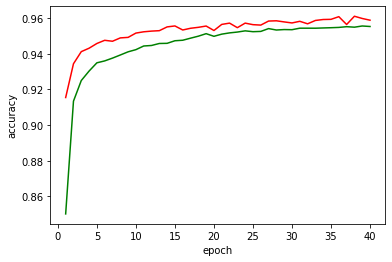

In [ ]:
training_df = pd.DataFrame.from_dict(history.history).assign(epoch=np.array(history.epoch)+1)
sns.lineplot(data=training_df, x='epoch', y='accuracy', color='green')
sns.lineplot(data=training_df, x='epoch', y='val_accuracy', color='red');

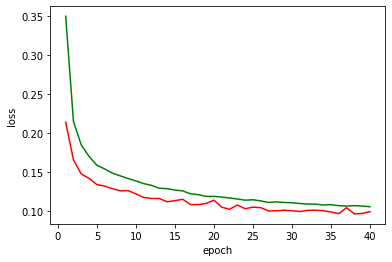

In [ ]:
training_df = pd.DataFrame.from_dict(history.history).assign(epoch=np.array(history.epoch)+1)
sns.lineplot(data=training_df, x='epoch', y='loss', color='green')
sns.lineplot(data=training_df, x='epoch', y='val_loss', color='red');

We can confirm that the plotting result matches the data that we get while from the model training. The validation loss is getting increase after training for epoch 36.

From the plotting, we can see that both training data and validation data had a high loss and low accuracy during the beginning of the model training but after training for 5 epochs the loss and accuracy of both data are starting to getting improve. We also can see that the validation data training does not get trained smoothly with the model especially in the 15 to 24 epoch which had a lot of edges appear in the graph. However, the validation data get trained smoothly in epoch 27 to epoch 35 and had a small gap between the training dataset which is perfect because it informs us that the model will not get overfit or underfit with the data, so our final epoch should select between 27 to 35. Our team decided to pick the middle rate which is 33. 

Now we decide to re-create, compile and train the model with epoch 33, but this time we will not need to have a validation split because we had already decided our best epoch. 

In [ ]:
model_NN = get_ff_model()
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_NN.fit(X_train_NN, Y_train_NN, batch_size=128, epochs=33)

Epoch 1/33
810/810 [==============================] - 2s 1ms/step - loss: 0.3287 - accuracy: 0.8622
Epoch 2/33
810/810 [==============================] - 1s 1ms/step - loss: 0.2081 - accuracy: 0.9157
Epoch 3/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1773 - accuracy: 0.9276
Epoch 4/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1618 - accuracy: 0.9331
Epoch 5/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1526 - accuracy: 0.9366
Epoch 6/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1469 - accuracy: 0.9401
Epoch 7/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1397 - accuracy: 0.9422
Epoch 8/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1362 - accuracy: 0.9431
Epoch 9/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1327 - accuracy: 0.9451
Epoch 10/33
810/810 [==============================] - 1s 1ms/step - loss: 0.1282 - accuracy: 0.9467

In [ ]:
model_NN.evaluate(X_test_NN, Y_test_NN)

810/810 [==============================] - 1s 783us/step - loss: 0.0984 - accuracy: 0.9572


[0.09844657778739929, 0.957208514213562]

We can see that the accuracy and loss are quite from the test set similar to the result that we get from the validation set during the training which can tell us that the model had learned well with the unseen data.

In [ ]:
Y_pred_test = model_NN.predict(X_test_NN)
Y_pred_train = model_NN.predict(X_train_NN)
Y_pred_test = (Y_pred_test > 0.5) # round the data (become true 1 and false 0)
Y_pred_train = (Y_pred_train > 0.5) # round the data (become true 1 and false 0)

After we predicted the test data. We can now plot out the classificastion_report to see how the data get predicted with the model.

In [ ]:
print(classification_report(Y_test_NN, Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [ ]:
print(classification_report(Y_train_NN, Y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     58697
           1       0.97      0.94      0.95     44897

    accuracy                           0.96    103594
   macro avg       0.96      0.96      0.96    103594
weighted avg       0.96      0.96      0.96    103594



From the report, first, we can see that all the samples of the train and test dataset are get predicted successfully which had a total amount of 25893 for the test set and 103594 for the train set, both of them match the shape that we get from the X Y train and test.

However, not all of the data in the train set and test set get predicted correctly. In the train set, we can see that we get 97% of precision which mean they had almost 97% of "satisfaction" gets correctly identified from the total amount of "satisfaction" that we predicted in the model. For the recall, we get 98% in the training set, which means there had 98% of actual "satisfaction" get correctly identified from the actual "satisfaction" in data. The f1 measurement is just the balance between the recall and precision which had achieved 96% in our model. On the other hand, the prediction for the test set data is the same as the train set which also has 97% of precision, 98% of recall and 96% of f1. This tells us that the model does not get overfit or underfit since both results of the train and test are the same and close. 

Overall, we should focus on our aim measurement which is 96% of accuracy and 96% of f1 which is great because both results are nearly 1 so it informs us that the model is well predicted to the unseen data. 


# Task 5. Recommendation

We have trained and tested three models to select the best model so far. As a result of predicting the train and test in each model, the f-1 score showed good prediction results for all models without overfitting and underfitting.

First, in the test data prediction results of the Logistic Regression, the measurement of the f-1 score achieved 89%, and the accuracy of 87%. 

Second, in the test data prediction results of the Decision Tree, the f-1 score achieved 96%, and 95% accuracy could be identified. As a result of comparing the two models, the Decision Tree model was confirmed to be a model with 12% higher accuracy than the Logistic Regression. 

Finally, as a result of the test data prediction of the Neural Net Model, the f-1 score achieved 96%, and high accuracy was identified as 96%. In the Logistic Regression model and Decision Tree compared earlier, we identified that Decision Tree is a better model. 

So, we were able to select the best model by comparing the Decision Tree and the Neural Net model. Both models were not only well predicted for unseen data, but also showed similar performance. However, the Neural Net model was identified to be 1% more accurate than the Decision Tree. 
Therefore, as a result of comparing and analyzing the three models, our group recommends the Neural Net model that provides the highest accuracy.

The Neural Net model that we had developed is designed to handle the binary classification and it currently works well with the test data set that is provided, but it does not mean that it will work well with all unseen data.
If the unseen data that handle by our model is image data with a 2D array then properly our model will likely become underfitting because the image will require different activation functions or loss functions to process. If the unseen data that the model needs to handle had the same or close feature amount as our test data then the model will properly get above 90% of accuracy which is close to the result that we get in model training else the loss of our model will likely high and cause underfitting or overfitting because the unit of our model may not enough or too high to handle the unseen data.